# Project Proposal: Investigation of Incidents of Theft from Vehicle in the City of Vancouver Strathcona and Kitsilano Neighbourhoods
---

## 1.0 Introduction

The true cost of crime encompasses a wide range of factors that extend beyond the immediate impact of the crime itself.  Gabor (2014) identifies four broad categories that contribute to the aggregate cost of crime, including: (1) victim costs, (2) criminal justice costs, (3) opportunity costs, and (4) intaggible costs.

While the true cost of crime is difficult to quantify, and Canadian data does not permit an annual assessment of the cost at this time, a 2014 study published by the Fraser Institute (Easton et al. 2014) estimates that Canadians spend over $85 billion annually being victimized by, catching, and punishing crime. Undoubtedly crime, and the associated costs, pose a significant burden to society.  More accurate information on crime could guide our legal, political, and cultural stance toward crime and allow informed prioritization and development of programs that curtail criminal activity (Anderson, 1999).

The Vancouver Police Department (VPD) crime data set, publicaly available from the [VPD open data portal](https://geodash.vpd.ca/opendata/), contains 10 variables related to 854,615 reported crime incidents in the City of Vancouver between 2003 and 2022, as follows:

|Variable | Description |
|---------| ----------- |
| TYPE    | Type of crime activity (11 unique types)             |
| YEAR    | A four-digit field that indicates the year when the reported crime activity occurred |
| MONTH   | A numeric field that indicates the month when the reported crime activity occurred |
| DAY     | A two-digit field that indicates the day of the month when the reported crime activity occurred |
| HOUR    | A two-digit field that indicates the hour time (in 24 hours format) when the reported crime activity occurred |
| MINUTE  | A two-digit field that indicates the minute when the reported crime activity occurred |
| HUNDRED_BLOCK | Generalized location of the reported crime activity |
| NEIGHBOURHOOD | Vancouver neighbourhood location of reported crime activity (24 unique neighbourhoods) |
| X             | X-coordinate location of reported crime activity (UTM Zone 10) |
| Y             | Y-coordinate location of reported crime activity (UTM Zone 10) |

We consider the VPD crime data set to represent a sample of all crime incidents that occurred in Vancouver between 2003 and 2022.  This project aims to answer a question of the form: can we use the VPD data set to determine whether certain Vancouver neighbourhoods experience higher annual incidents of crime relative to others?  

To focus our analysis, we will constrain the crime type to *Theft from Vehicle* considering that this represents the highest proportion (27.9%) of reported crime incidents in the data set. Furthermore, a reaonable hypthoesis may be that annual incidents of theft from vehicles are higher in poorer neighbourhoods. 2016 median household income data for the Strathcona and Kitsilano neighbourhoods, available on the [Canada Mortgage and Housing Corporation (CMHC) website](https://www03.cmhc-schl.gc.ca/hmip-pimh/en/TableMapChart/TableMatchingCriteria?GeographyType=MetropolitanMajorArea&GeographyId=2410&CategoryLevel1=Population%2C%20Households%20and%20Housing%20Stock&CategoryLevel2=Household%20Income&ColumnField=HouseholdIncomeRange&RowField=Neighbourhood&SearchTags%5B0%5D.Key=Households&SearchTags%5B0%5D.Value=Number&SearchTags%5B1%5D.Key=Statistics&SearchTags%5B1%5D.Value=AverageAndMedian), is reported to be approximatley \\$23,000 and \\$70,000, respecively.  We therefore refine our objective to answer the specific question: are annual incidents of *Theft from Vehicle* higher in Strathcona than in Kitsilano?  We will use a point estimate of the mean difference in annual incidents of *Theft from Vehicle* in the Strathcona and Kitsilano neighbourhoods and statistical inference to attempt to answer this question.

## 2.0 Preliminary Results

In the preliminary analysis, we read the VPD crime data set from GitHub into R and clean and wrangle the data into a tidy format.  From the initial set of 10 variables we select the three that are relevant to our anaylsis: `TYPE`, `YEAR` and `NEIGHBOURHOOD`, and remove any observations from 2023 as this data is incomplete. **Table 1** provides a glimpse of the first six rows of the raw data set.  **Table 2** is a summary of the count and proportion of crime incidents by `TYPE`.  Our data of interest, *Theft from Vehicle* incidents in the Strathcona and Kitsilano neighbourhoods, are then filtered from the data set and summarized to provide a count of incidents per year (**Table 3**).  Summary statsitics (mean, min., max., and standard deviation) for the annual number of *Theft from Vehicle* incidents in the Strathcona and Kitsilano neighbourhoods between 2003 and 2022 is provided in **Table 4**.

Histogram and boxplot visualizations showing the distribution of annual *Theft from Vehicle* incidents between 2003 and 2022 for the Kitsilano and Strahcona neighbourhoods are shown on **Figure 1** and **Figure 2**, respectively. 

Based on the preliminary analysis results summarized in **Table 4** and shown on **Figures 1 and 2**, we see that the mean annual *Theft from Vehicle* incidents in the Strathcona sample (644) are marginally higher than the mean annual incidents in the Kitsilano sample (588), equating to a mean deifference of approximatley 56.  

In [1]:
# load libraries and set seed value
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
#-------------------------------------------------------
# Code to load data into R, clean, wrangle and summarize
#-------------------------------------------------------

# read data set from GitHub
crime_data_raw <- read_csv("https://github.com/jburden1/STAT201_Project_Group14/raw/main/vpd_crime_data/crimedata_csv_AllNeighbourhoods_AllYears.csv")

# select TYPE, YEAR, and NEIGHBOURHOOD and remove observations from 2023
crime_data_tidy <- crime_data_raw |> 
    select(TYPE, YEAR, NEIGHBOURHOOD) |> 
    filter(YEAR != 2023)

# summarize data by crime TYPE
crime_data_type_summary <- crime_data_tidy |>
    group_by(TYPE) |>
    summarize(INCIDENT_COUNT = n(), PROPORTION = INCIDENT_COUNT / nrow(crime_data_tidy)) |>
    arrange(desc(INCIDENT_COUNT))
    
# get yearly theft from vehicle incident counts in Strathcona and Kitsilano NEIGHBOURHOOD
crime_vehicle_filtered <- crime_data_tidy |>
    filter(TYPE == "Theft from Vehicle", NEIGHBOURHOOD == "Strathcona" | NEIGHBOURHOOD == "Kitsilano") |>
    group_by(YEAR, NEIGHBOURHOOD) |>
    summarize(INCIDENT_COUNT = n()) |>
    arrange(desc(NEIGHBOURHOOD))
# pivot data to improve readability 
crime_vehicle_filtered_wide <- crime_vehicle_filtered |>
    pivot_wider(names_from = YEAR, values_from = INCIDENT_COUNT)

# calculate summary statstics
crime_vehicle_stats <- crime_vehicle_filtered |>
    ungroup() |>
    group_by(NEIGHBOURHOOD) |>
    summarize(n = n(), Mean = mean(INCIDENT_COUNT), Min = min(INCIDENT_COUNT), Max = max(INCIDENT_COUNT), SD = sd(INCIDENT_COUNT)) 

Rows: 854615 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.


**Table 1:** First six rows of VPD crime data set

In [3]:
# print Table 1
head(crime_data_raw)

TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Theft from Vehicle,2018,3,22,9,0,19XX TRIUMPH ST,Grandview-Woodland,495329.0,5459026
Theft from Vehicle,2004,4,6,7,0,19XX TRIUMPH ST,Grandview-Woodland,495341.2,5459026
Theft from Vehicle,2003,2,24,0,0,19XX TRIUMPH ST,Grandview-Woodland,495354.4,5459026
Theft from Vehicle,2019,8,19,16,0,19XX TRIUMPH ST,Grandview-Woodland,495354.4,5459026
Theft from Vehicle,2018,11,8,1,0,19XX TRIUMPH ST,Grandview-Woodland,495356.6,5459026
Theft from Vehicle,2005,10,15,12,0,19XX TRIUMPH ST,Grandview-Woodland,495357.0,5459017


**Table 2:** Summary of crime incidents by type for all neighbourhoods between 2003 and 2022.

In [4]:
# print Table 2
crime_data_type_summary

TYPE,INCIDENT_COUNT,PROPORTION
<chr>,<int>,<dbl>
Theft from Vehicle,236890,0.2791631117
Other Theft,208920,0.2462018544
Mischief,101821,0.1199909966
Offence Against a Person,73561,0.0866879888
Break and Enter Residential/Other,71483,0.0842391689
Break and Enter Commercial,46281,0.0545398623
Theft of Vehicle,44283,0.0521853184
Theft of Bicycle,36303,0.0427812843
Vehicle Collision or Pedestrian Struck (with Injury),28387,0.0334526711


**Table 3:** Number of Theft from Vehicle incidents in the Strathcona and Kitsilano neighbourhoods between 2003 and 2022.

In [5]:
# print Table 3
crime_vehicle_filtered_wide 

NEIGHBOURHOOD,2003,2004,2005,2006,2007,2008,2009,2010,2011,⋯,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Strathcona,1155,1066,977,697,627,522,501,407,393,⋯,328,519,523,754,732,878,946,638,375,472
Kitsilano,871,884,955,857,516,478,574,461,396,⋯,405,515,558,671,603,753,652,545,349,256


**Table 4:** Summary statsitics (mean, min., max., and standard deviation) for the annual number of Theft from Vehicle incidents in the Strathcona and Kitsilano neighbourhoods between 2003 and 2022.

In [6]:
# print Table 4
crime_vehicle_stats

NEIGHBOURHOOD,n,Mean,Min,Max,SD
<chr>,<int>,<dbl>,<int>,<int>,<dbl>
Kitsilano,20,588.45,256,955,192.8314
Strathcona,20,644.40,328,1155,248.8241


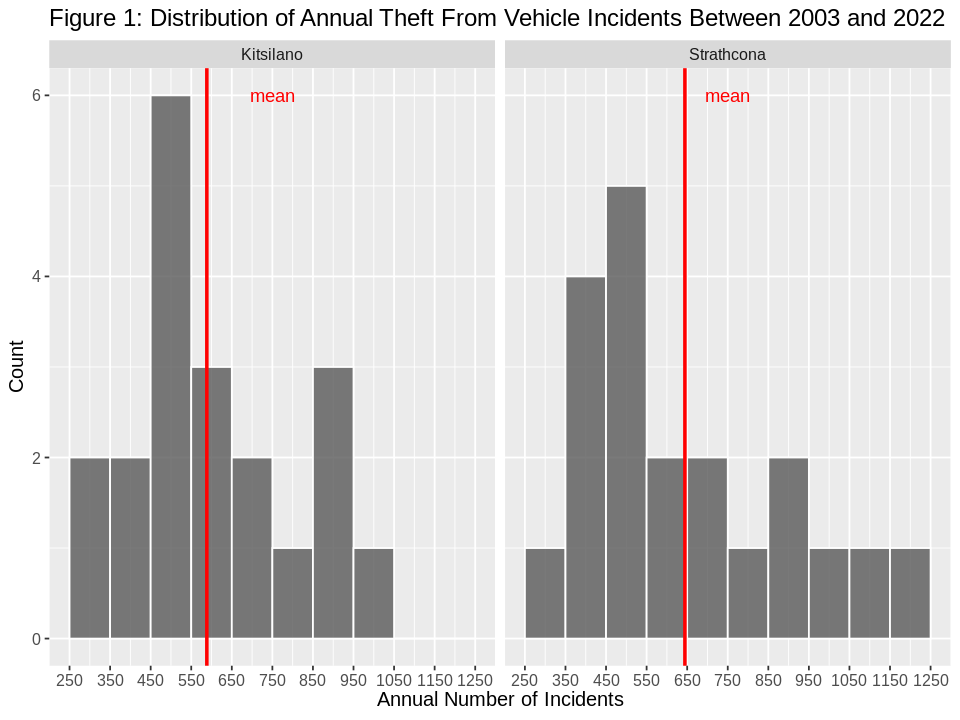

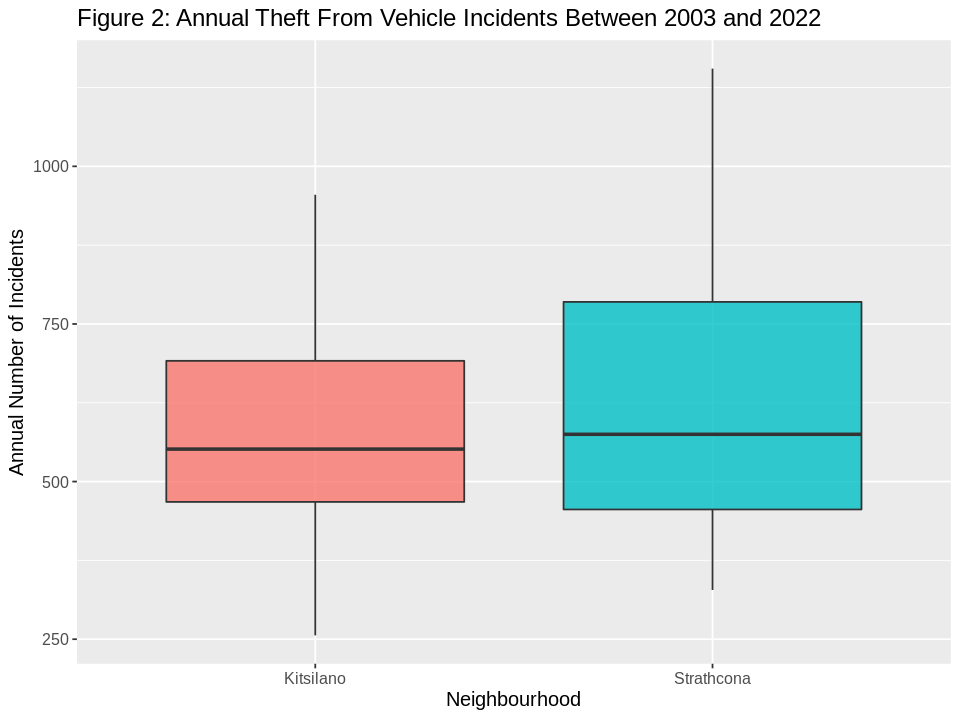

In [7]:
#-------------------------------------------------------
# Code to create histogram and boxplot visualizations
#-------------------------------------------------------

options(repr.plot.width = 8, repr.plot.height = 6)

# historgram
crime_hist <- crime_vehicle_filtered |>
    ggplot() +
    geom_histogram(aes(x = INCIDENT_COUNT), color = "white", binwidth = 100, alpha = 0.8) +
    scale_x_continuous(breaks = seq(250, 1250, 100)) +
    geom_vline(data = crime_vehicle_stats, mapping = aes(xintercept = Mean), color = "red", size = 1) +
    facet_wrap(~NEIGHBOURHOOD) +
    xlab("Annual Number of Incidents") +
    ylab("Count") +
    ggtitle("Figure 1: Distribution of Annual Theft From Vehicle Incidents Between 2003 and 2022") +
    annotate("text", x = 750, y = 6, label = "mean", angle = 0, color = "red") +
    theme(text = element_text(size = 12))
crime_hist
    
# boxplot
crime_box <- crime_vehicle_filtered |>
    ggplot(aes(x = NEIGHBOURHOOD, y = INCIDENT_COUNT)) +
    geom_boxplot(aes(fill = NEIGHBOURHOOD), alpha = 0.8, show.legend = FALSE) +
    xlab("Neighbourhood") +
    ylab("Annual Number of Incidents") +
    ggtitle("Figure 2: Annual Theft From Vehicle Incidents Between 2003 and 2022") +
    theme(text = element_text(size = 12))
crime_box 

## 3.0 Methods: Plan

* What is your point estimate?
    * As we see our two distributions above, we can see that the mean of annuale number of incidents for Kitsilano is 588.45 and Strathcona is 644.40. These values are our point estimate where the difference is 55.95 is the point estimate for our mean difference of the two.
* How do you quantify the errors of your estimates?
    * By using statistical inference techniques, we may measure the errors of our estimations. Calculating confidence intervals for the estimated mean difference in yearly incidences of Steal from Vehicles between Kitsilano and Strathcona is a typical technique.For our project, a 95% confidence interval for the difference in the mean annual incidences of vehicle theft between two Vancouver communities is an appropriate choice. It offers a suitable mix between assurance and accuracy. Increased uncertainty or decreased confidence, respectively, would follow from selecting a greater or lower confidence level.
* How do you establish statistical significance of your findings?
    * To establish a statistical significance for our findings, we would conduct hypothesis testing with a significance level of 0.05 (5%). By using the infer package, our process would follow: specify -> hypothesize -> generate -> calculate -> visualize. Since we would have already built our confidence interval, switching to hypothesis testing will be easy. With this, we can provide conclusive evidence to either support or reject our null hypothesis.
* What do you expect to find? What impact could such findings have? What future questions could this lead to?
    * We are expect to find that annual incidents of theft from vehicle between the two neighborhoods is not statistically significant, which means there is no strong evidence to suggest a difference in the mean annual incidents of theft from vehicle between Strathcona and Kitsilano neighborhoods in Vancouver. Such findings could have implications for the allocation of resources and deployment of policing strategies in the neighborhoods. More research on variables like demographics, vehicle kinds, time of day, and location that may influence incidences of theft from automobiles may be prompted by the project's findings. Future studies could examine the effectiveness of different policing tactics in minimising such instances.
* What are the potential challenges/drawbacks?
    * Our data is limited because the sample size in Strathcona and Kitsilano is 20. Therefore, it may not accurately reflect relevant populations or occurrences, resulting in biased conclusions. In addition, it needs to rely on simulation-based methodologies for hypothesis testing and confidence interval calculations.
* How do you make sure your analysis is reproducible?
    * In order to guarantee that the same random numbers are created every time the code is executed, we may use the set.seed() function. Creating a workflow documentation will help guarantee that others can do the same procedures as you did and get the same outcomes by noting all the actions you performed in the data.

## 4.0 References
Anderson, D. A. (1999). The Aggregate Burden of Crime. The Journal of Law & Economics, 42(2), 611–642.

Easton, S., Brantingham, P., Furness, H. (2014). The Cost of Crime in Canada. Canada: Fraser Institute.

Gabor, T. (2015). Costs of crime and criminal justice responses. Ottawa, ON: Public Safety Canada. 


